In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

print("Path to dataset files:", path)

/Users/duongminhquan/Documents/movie-recommender/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/duongminhquan/Documents/movie-recommender/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 175k/175k [00:00<00:00, 364kB/s]

Extracting files...
Path to dataset files: /Users/duongminhquan/.cache/kagglehub/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/versions/1


In [3]:
import pandas as pd

In [7]:
movies = pd.read_csv(path+"/imdb_top_1000.csv")
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


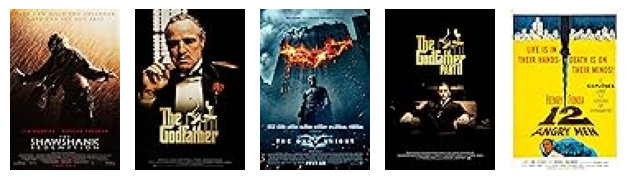

In [13]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

fig, axes = plt.subplots(1, 5)
for i, link in enumerate(movies['Poster_Link'].head()):
    response = requests.get(link)
    img = Image.open(BytesIO(response.content))
    axes[i].imshow(img)
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [16]:
movies.nunique()

Poster_Link      1000
Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
Genre             202
IMDB_Rating        17
Overview         1000
Meta_score         63
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             823
dtype: int64

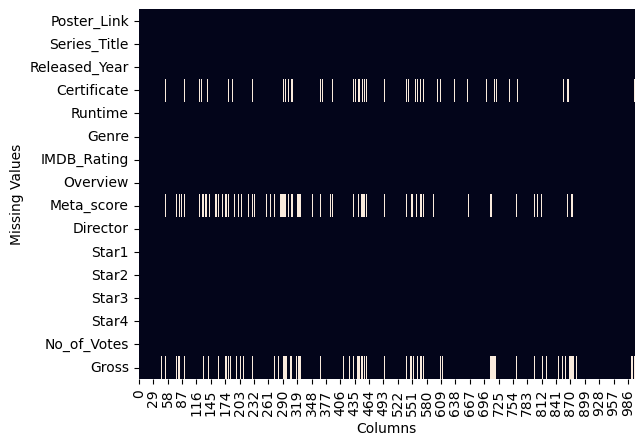

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(movies.isna().transpose(),cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

In [21]:
movies["Released_Year"] = movies["Released_Year"].astype(str).str.extract(r'(\d{4})').astype(float)

In [28]:
movies["Gross"] = (
    movies["Gross"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)

movies["Gross"] = pd.to_numeric(movies["Gross"], errors="coerce")

In [22]:
import numpy as np
from datetime import datetime

current_year = datetime.now().year

movies['age'] = current_year - movies['Released_Year']

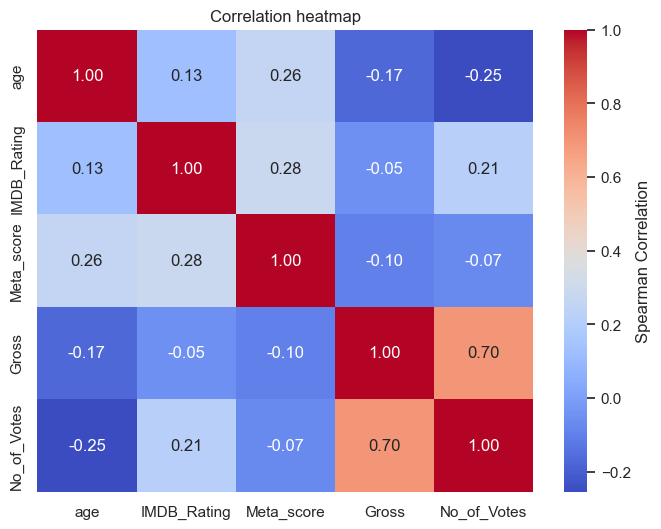

In [31]:
columns_of_interest = ['age', 'IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']

corr_matrix = movies[columns_of_interest].corr(method='spearman')

sns.set_theme(style='dark')
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Spearman Correlation'})
heatmap.set_title('Correlation heatmap')
plt.show()

In [36]:
fully_movies = movies[~(movies['Gross'].isna()) & 
                      ~(movies['Meta_score'].isna()) &
                      ~(movies['Released_Year'].isna()) 
]
fully_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,age
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,31.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,53.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,17.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,51.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,68.0


In [37]:
fully_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    749 non-null    object 
 1   Series_Title   749 non-null    object 
 2   Released_Year  749 non-null    float64
 3   Certificate    713 non-null    object 
 4   Runtime        749 non-null    object 
 5   Genre          749 non-null    object 
 6   IMDB_Rating    749 non-null    float64
 7   Overview       749 non-null    object 
 8   Meta_score     749 non-null    float64
 9   Director       749 non-null    object 
 10  Star1          749 non-null    object 
 11  Star2          749 non-null    object 
 12  Star3          749 non-null    object 
 13  Star4          749 non-null    object 
 14  No_of_Votes    749 non-null    int64  
 15  Gross          749 non-null    float64
 16  age            749 non-null    float64
dtypes: float64(5), int64(1), object(11)
memory usage: 105.3+ KB

In [38]:
fully_movies.nunique()

Poster_Link      749
Series_Title     749
Released_Year     87
Certificate       12
Runtime          121
Genre            175
IMDB_Rating       17
Overview         749
Meta_score        63
Director         426
Star1            500
Star2            633
Star3            657
Star4            704
No_of_Votes      749
Gross            744
age               87
dtype: int64

In [39]:
fully_movies['Genre'].head(10)

0                        Drama
1                 Crime, Drama
2         Action, Crime, Drama
3                 Crime, Drama
4                 Crime, Drama
5     Action, Adventure, Drama
6                 Crime, Drama
7    Biography, Drama, History
8    Action, Adventure, Sci-Fi
9                        Drama
Name: Genre, dtype: object

In [43]:
from itertools import chain

fully_movies["Genre_list"] = fully_movies["Genre"].str.split(", ")

all_genres = list(chain.from_iterable(fully_movies["Genre_list"]))
unique_genres = set(all_genres)
print(sorted(unique_genres))

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


/var/folders/9c/cps2yf2n16v_yvn4kyc38p900000gn/T/ipykernel_73580/1247356769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_movies["Genre_list"] = fully_movies["Genre"].str.split(", ")


In [45]:
print(len(unique_genres))
print(sorted(unique_genres))

21
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


Genre_list
Drama        530
Comedy       166
Adventure    164
Crime        151
Action       143
Thriller     104
Romance       91
Biography     88
Mystery       73
Animation     64
Sci-Fi        58
Fantasy       55
Family        45
History       38
War           33
Music         28
Horror        21
Sport         17
Western       16
Musical       11
Film-Noir      8
Name: count, dtype: int64


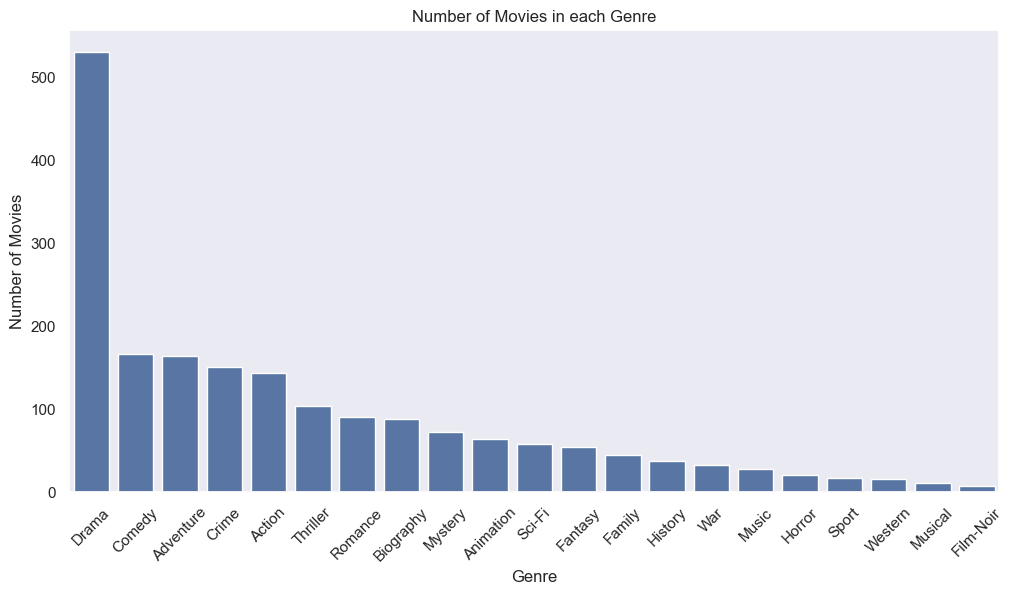

In [48]:
genre_counts = fully_movies["Genre_list"].explode().value_counts()
print(genre_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:], y=genre_counts.values[:])
plt.xticks(rotation=45)
plt.title("Number of Movies in each Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

In [ ]:
for genre in unique_genres:
    fully_movies[f"Genre_{genre}"] = fully_movies["Genre_list"].apply(lambda x: 1 if genre in x else 0)

In [52]:
fully_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Genre_Music,Genre_Romance,Genre_Animation,Genre_Film-Noir,Genre_Biography,Genre_Western,Genre_Mystery,Genre_Drama,Genre_Horror,Genre_Family
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,0,0,0,0,0,0,0,1,0,0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,0,0,0,0,0,0,0,1,0,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,0,0,0,0,0,0,0,1,0,0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,0,0,0,0,0,0,0,1,0,0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
fully_movies['words_in_Overview'] = fully_movies['Overview'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

In [55]:
fully_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Genre_Romance,Genre_Animation,Genre_Film-Noir,Genre_Biography,Genre_Western,Genre_Mystery,Genre_Drama,Genre_Horror,Genre_Family,words_in_Overview
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,0,0,0,0,0,0,1,0,0,19
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,0,0,0,0,0,0,1,0,0,16
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,0,0,0,0,0,0,1,0,0,33
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,0,0,0,0,0,0,1,0,0,29
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,0,0,0,0,0,0,1,0,0,18


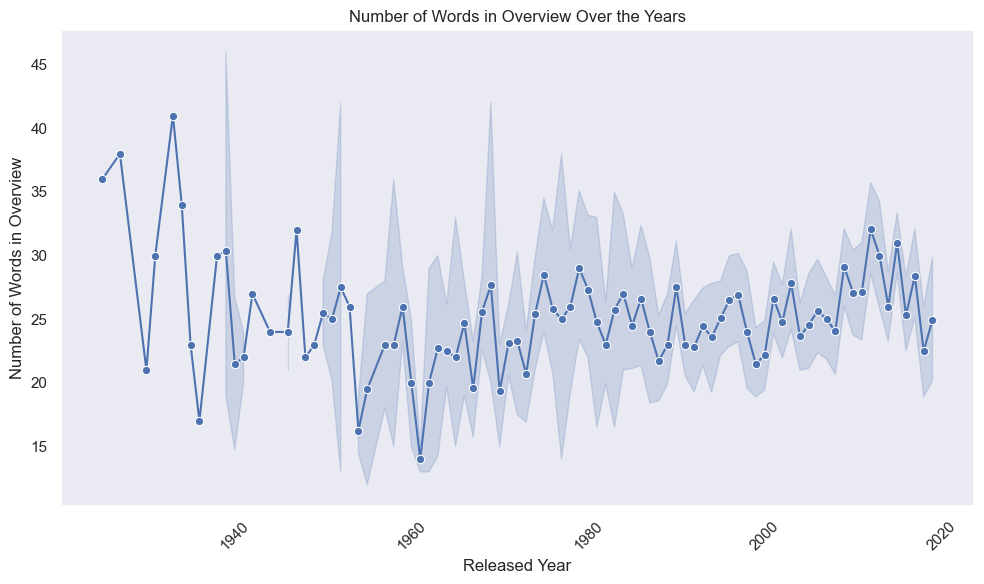

In [56]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=fully_movies, x='Released_Year', y='words_in_Overview', marker='o')
plt.title('Number of Words in Overview Over the Years')
plt.xlabel('Released Year')
plt.ylabel('Number of Words in Overview')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
fully_movies["Runtime"] = fully_movies["Runtime"].str.replace(" min", "", regex=False)

fully_movies["Runtime"] = pd.to_numeric(fully_movies["Runtime"], errors="coerce")

/var/folders/9c/cps2yf2n16v_yvn4kyc38p900000gn/T/ipykernel_73580/2598955101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_movies["Runtime"] = fully_movies["Runtime"].str.replace(" min", "", regex=False)
/var/folders/9c/cps2yf2n16v_yvn4kyc38p900000gn/T/ipykernel_73580/2598955101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_movies["Runtime"] = pd.to_numeric(fully_movies["Runtime"], errors="coerce")


In [66]:
fully_movies['Runtime']

0      142
1      175
2      152
3      202
4       96
      ... 
990    157
991    144
992     78
994     87
997    118
Name: Runtime, Length: 749, dtype: int64

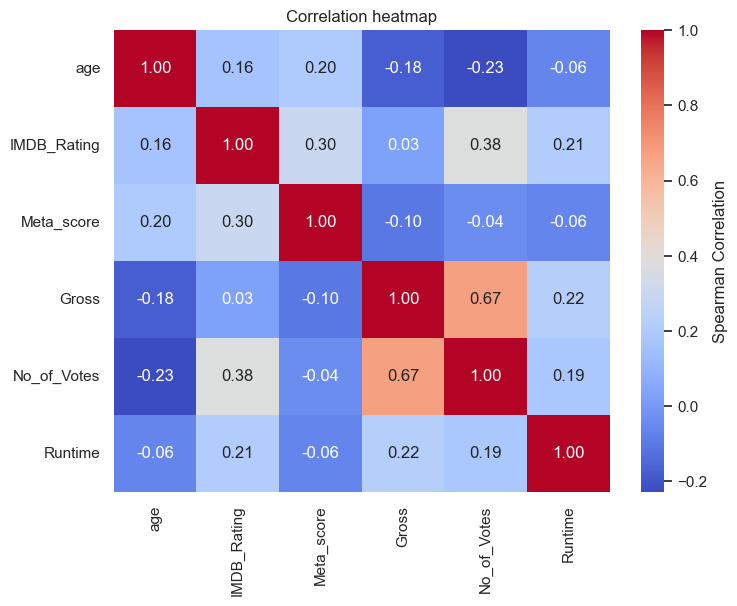

In [67]:
columns_of_interest = ['age', 'IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes', 'Runtime']

corr_matrix = fully_movies[columns_of_interest].corr(method='spearman')

sns.set_theme(style='dark')
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Spearman Correlation'})
heatmap.set_title('Correlation heatmap')
plt.show()

In [68]:
(
    fully_movies
    .drop(columns=['words_in_Overview', 'age', 'Gross', 'Star1', 'Star2', 'Star3', 'Star4', 'Certificate'], axis=1)
    .to_csv('movies_cleaned.csv', index=False)
)